# Лабораторная работа №4. Выполнил Акинин Александр, студент 431 группы

In [1]:
import csv
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

### 1. Загрузите данные из csv-файла в двумерный массив (или список)

In [2]:
# Задаем имя файла
# filename = r"C:\Users\akininaa\Desktop\01_Архангельск.csv"
filename = r"01_Архангельск.csv"

# Открываем файл, выжимаем оттуда названия полей и данные
with open(filename) as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    matrix = np.array(list(csvreader), dtype=np.float32)

print('Значения полей:')
print(fields)
print()

year = matrix[:,0]
jan = matrix[:,1]
feb = matrix[:,2]
mar = matrix[:,3]
apr = matrix[:,4]
may = matrix[:,5]
jun = matrix[:,6]
jul = matrix[:,7]
aug = matrix[:,8]
sep = matrix[:,9]
octo = matrix[:,10]
now = matrix[:,11]
dec = matrix[:,12]

Значения полей:
['\ufeffГод', 'янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек', 'средняя']



In [3]:
def filter_invalid_data(array, max_val):
    for i, a_i in enumerate(array):
        if a_i < max_val:
            continue
        if i == 0:
            array[i] = array[i+1]
        elif i == len(array)-1:
            array[i] = array[i-1]
        else:
            array[i] = (array[i+1]+array[i-1])/2
    return array

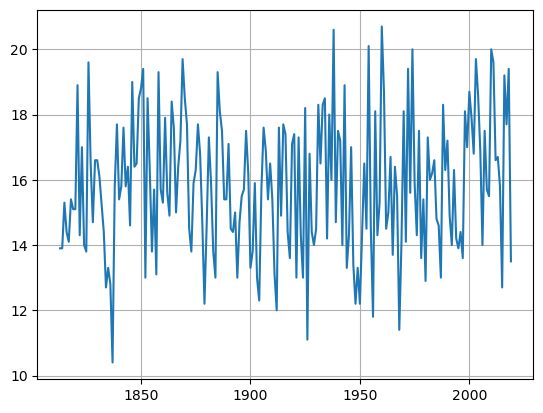

In [4]:
jan = filter_invalid_data(jan, 100)
feb = filter_invalid_data(feb, 100)
mar = filter_invalid_data(mar, 100)
apr = filter_invalid_data(apr, 100)
may = filter_invalid_data(may, 100)
jun = filter_invalid_data(jun, 100)
jul = filter_invalid_data(jul, 100)
aug = filter_invalid_data(aug, 100)
sep = filter_invalid_data(sep, 100)
octo = filter_invalid_data(octo, 100)
now = filter_invalid_data(now, 100)
dec = filter_invalid_data(dec, 100)

plt.plot(year, jul)
plt.grid()

### 2. Для любого заданного столбца данных (кроме первого) и любого из 12-ти последовательных строчек из массива постройте интрополяционный полином Лагранжа, выведите его график на сетке с шагом $h$ по оси $x$ - 0.1 вместе с исходными точками.

In [5]:
# Базовый алгоритм рассчёта значений базисных функций в полиноме Лагранжа
def basis_polynom(i, x, X_sample):
    sample_size = len(X_sample)
    res = 1
    for m in range(sample_size):
        if m != i:
            res *= (x - X_sample[m])/(X_sample[i] - X_sample[m])
    return res

# Функция рассчёта значения полинома Лагранжа в точке х
def Lagrange(x_inter, X_sample, Y_sample):
    n = len(X_sample)
    
    y_res = np.zeros_like(x_inter)
    for m, x in enumerate(x_inter):
        tmp = [basis_polynom(i, x, X_sample) * Y_sample[i] 
           for i in range(n)]
        y_res[m] = np.sum(tmp)
    
    return y_res

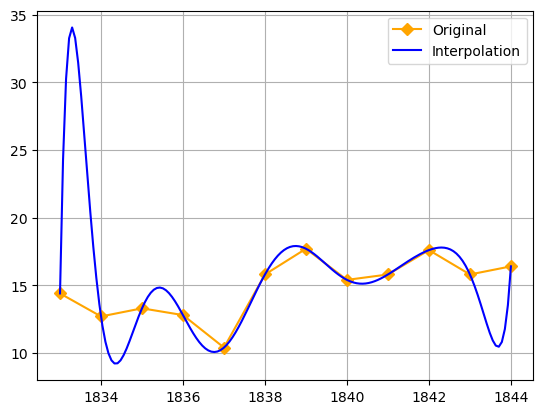

In [6]:
# Задаем начало и размер массива образца данных
sample_start, sample_size = 20, 12
sample_end = sample_start + sample_size

# Задаем образцы данных
X_sample = year[sample_start:sample_end]
Y_sample = jul[sample_start:sample_end]

# Задаем массив по оси X и Y, котороми будем интерполировать образец данных
interpolate_num = 150
X_interpolate = np.linspace(year[sample_start], year[sample_end-1], interpolate_num)

# Интерполируем образец данных
Y_interpolate = Lagrange(X_interpolate, X_sample, Y_sample)

# Интерполируем образец данных
# for i, x in enumerate(X_interpolate):
#     Y_interpolate[i] = Lagrange(x, X_sample, Y_sample)

# График
plt.plot(X_sample, Y_sample, marker='D', color='orange', label='Original')
plt.plot(X_interpolate, Y_interpolate, color='b', label='Interpolation')
plt.legend()
plt.grid()

### 3. Для любого заданного столбца данных (кроме первого) и любых 6-ти последовательных строчек из массива выполнить интрополяцию с помощью первой интрополяционной формулы Ньютона ($h=0.1$), построить график.

In [7]:
def Newton_coeff(Y_sample):
    n = len(Y_sample)
    
    a = [list(Y_sample),]
    for i in range(1,n):
        a.append(list(np.diff(a[i-1])))
    
    return a

def first_Newton(x_inter, X_sample, Y_sample):
    
    h = X_sample[1] - X_sample[0]
    a = Newton_coeff(Y_sample)
    a_coeff = [a_i[0] for a_i in a]
    
    y_res = np.zeros_like(x_inter)
    for m, x in enumerate(x_inter):
        y_res[m] = np.sum([
            a_coeff[i] * np.prod([
                x-X_sample[j] 
                for j in range(i)
            ]) / (np.math.factorial(i) * h**i)
            for i in range(len(a_coeff))])
    
    return y_res

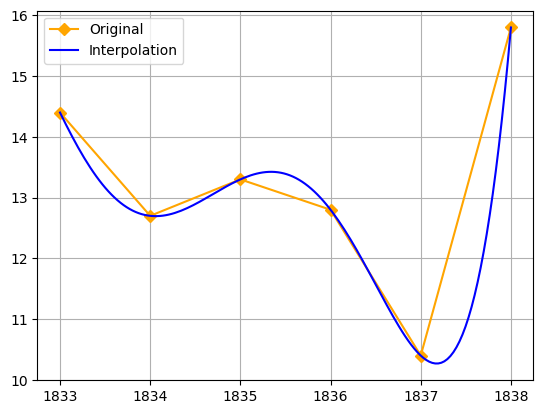

In [8]:
# Задаем начало и размер массива образца данных
sample_start, sample_size = 20, 6
sample_end = sample_start + sample_size

# Задаем образцы данных
X_sample = year[sample_start:sample_end]
Y_sample = jul[sample_start:sample_end]

# Задаем массив по оси X и Y, котороми будем интерполировать образец данных
interpolate_num = 150
X_interpolate = np.linspace(year[sample_start], year[sample_end-1], interpolate_num)

# Интерполируем образец данных
Y_interpolate = first_Newton(X_interpolate, X_sample, Y_sample)

# График
plt.plot(X_sample, Y_sample, marker='D', color='orange', label='Original')
plt.plot(X_interpolate, Y_interpolate, color='b', label='Interpolation')
plt.legend()
plt.grid()

### 4. Для следующих 6-ти строчек из массива выполнить интрополяцию с помощью второй интрополяционной формулы Ньютона ($h=0.1$), построить график.

In [9]:
def second_Newton(x_inter, X_sample, Y_sample):
    
    n = len(X_sample)
    h = X_sample[1] - X_sample[0]
    a = Newton_coeff(Y_sample)
    a_coeff = [a_i[-1] for a_i in a]
    
    y_res = np.zeros_like(x_inter)
    for m, x in enumerate(x_inter):
        y_res[m] = np.sum([
            a_coeff[i] * np.prod([
                x-X_sample[n-j-1] 
                for j in range(i)
            ]) / (np.math.factorial(i) * h**i)
            for i in range(len(a_coeff))])
    
    return y_res

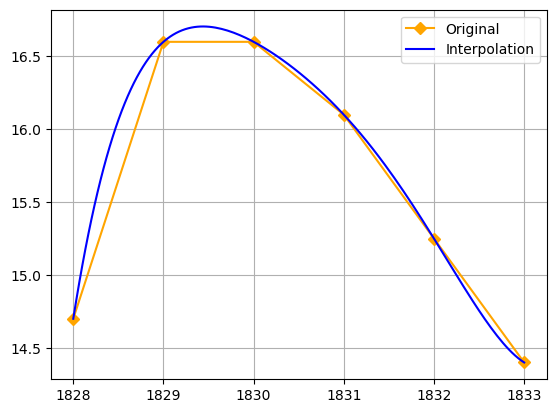

In [10]:
# Задаем начало и размер массива образца данных
sample_start, sample_size = 15, 6
sample_end = sample_start + sample_size

# Задаем образцы данных
X_sample = year[sample_start:sample_end]
Y_sample = jul[sample_start:sample_end]

# Задаем массив по оси X и Y, котороми будем интерполировать образец данных
interpolate_num = 150
X_interpolate = np.linspace(year[sample_start], year[sample_end-1], interpolate_num)

# Интерполируем образец данных
Y_interpolate = second_Newton(X_interpolate, X_sample, Y_sample)

# График
plt.plot(X_sample, Y_sample, marker='D', color='orange', label='Original')
plt.plot(X_interpolate, Y_interpolate, color='b', label='Interpolation')
plt.legend()
plt.grid()

### 5. Для любого заданного столбца данных (кроме первого) и всех строчек массива, не содержащих недостоверные значения, выполнить аппроксимацию степенным полиномом (степень полинома - до 5), построить график.

In [11]:
def polynomial_fit(X_sample, Y_sample, poly_degree):
    
    # Создать матрицу и вектор для матричного уравнения 
    # в соответствии с методом наименьших квадратов
    A = np.zeros((poly_degree+1, poly_degree+1), dtype=np.float64)
    for i in range(poly_degree+1):
        for j in range(poly_degree+1):
            A[i,j] = np.sum([x**(i+j) for x in X_sample])
    
    b = np.zeros((poly_degree+1))
    for i in range(poly_degree+1):
        b[i] = np.sum([x**(i) * y for x,y in zip(X_sample, Y_sample)])
    
    A_inv = np.linalg.inv(A)
    
    # Решение матричного уравнения метода наименьших квадратов
    poly_coeff = np.dot(A_inv, b)
    
    # Создание полинома
    poly = lambda x: np.sum([
        poly_coeff[i] * x**i 
        for i in range(poly_degree+1)])
    
    return poly

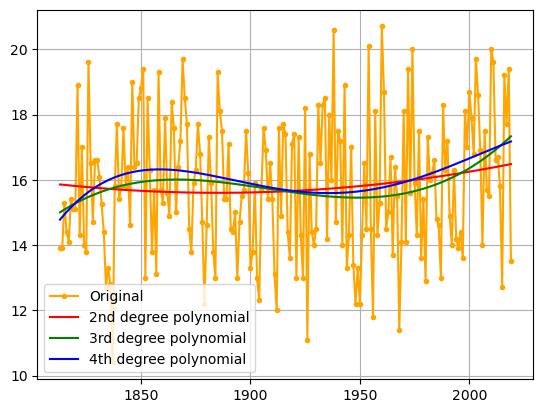

In [12]:
# Задаем начало и размер массива образца данных
sample_start, sample_size = 0, len(year)
sample_end = sample_start + sample_size

# Задаем образцы данных
X_sample = year[sample_start:sample_end]
Y_sample = jul[sample_start:sample_end]

# Задаем массив по оси X и Y, котороми будем интерполировать образец данных
interpolate_num = 150
X_interpolate = np.linspace(year[sample_start], year[sample_end-1], interpolate_num)
Y_interpolate_2 = np.zeros_like(X_interpolate)
Y_interpolate_3 = np.zeros_like(X_interpolate)
Y_interpolate_4 = np.zeros_like(X_interpolate)

# Интерполируем образец данных
interpolate_polynom_2 = polynomial_fit(X_sample, Y_sample, 2)
interpolate_polynom_3 = polynomial_fit(X_sample, Y_sample, 3)
interpolate_polynom_4 = polynomial_fit(X_sample, Y_sample, 4)
for i, x in enumerate(X_interpolate):
    Y_interpolate_2[i] = interpolate_polynom_2(x)
    Y_interpolate_3[i] = interpolate_polynom_3(x)
    Y_interpolate_4[i] = interpolate_polynom_4(x)

# График
plt.plot(X_sample, Y_sample, marker='.', color='orange', label='Original')
plt.plot(X_interpolate, Y_interpolate_2, color='r', label='2nd degree polynomial')
plt.plot(X_interpolate, Y_interpolate_3, color='g', label='3rd degree polynomial')
plt.plot(X_interpolate, Y_interpolate_4, color='b', label='4th degree polynomial')
plt.legend()
plt.grid()

## Дополнительные задания

### 1. Для любого заданного столбца данных и любых 12-ти последовательных строчек из массива выполнить интерполяцию на сетке с $h=0.1$ с помощью кубического сплайна, построить график.

In [13]:
def cubic_splines(x_inter, X_sample, Y_sample):

    n = len(X_sample)
    xdiff = np.diff(X_sample)
    ydiff = np.diff(Y_sample)

    Li = np.zeros(n)
    Li_1 = np.zeros(n-1)
    z = np.zeros(n)

    Li[0] = np.sqrt(2*xdiff[0])
    Li_1[0], B0 = 0.0, 0.0
    z[0] = B0 / Li[0]

    for i in range(1, n-1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = np.sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = n - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = np.sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = n - 1
    z[i] = z[i] / Li[i]
    for i in range(n-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    index = X_sample.searchsorted(x_inter)
    np.clip(index, 1, n-1, index)

    xi1, xi0 = X_sample[index], X_sample[index-1]
    yi1, yi0 = Y_sample[index], Y_sample[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    splines = zi0/(6*hi1)*(xi1-x_inter)**3 + zi1/(6*hi1)*(x_inter-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x_inter-xi0) + (yi0/hi1 - zi0*hi1/6)*(xi1-x_inter)
    return splines

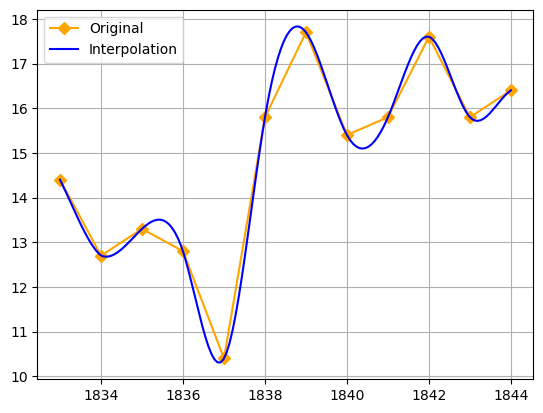

In [14]:
# Задаем начало и размер массива образца данных
sample_start, sample_size = 20, 12
sample_end = sample_start + sample_size

# Задаем образцы данных
X_sample = year[sample_start:sample_end]
Y_sample = jul[sample_start:sample_end]

# Задаем массив по оси X и Y, котороми будем интерполировать образец данных
interpolate_num = 150
X_interpolate = np.linspace(year[sample_start], year[sample_end-1], interpolate_num)

# Интерполируем образец данных
Y_interpolate = cubic_splines(X_interpolate, X_sample, Y_sample)

# График
plt.plot(X_sample, Y_sample, marker='D', color='orange', label='Original')
plt.plot(X_interpolate, Y_interpolate, color='b', label='Interpolation')
plt.legend()
plt.grid()